# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/MachineLearning/bank-additional-full.csv", sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [ ]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

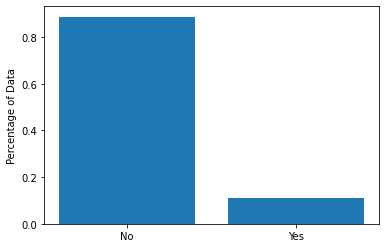

In [ ]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
###############
###TRANSFORM###
############### need to resample
oversample = SMOTE()
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train)


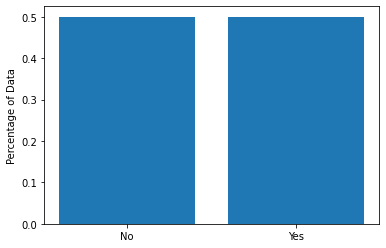

In [ ]:
obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.207\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.279\nsamples = 18831\nvalue = [15676, 3155]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.112\nsamples = 10591\nvalue = [9959, 632]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.094\nsamples = 10380\nvalue = [9868, 512]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.491\nsamples = 211\nvalue = [91, 120]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.312\ngini = 0.425\nsamples = 8240\nvalue = [5717, 2523]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.483\nsamples = 5974\nvalue = [3531, 2443]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.068\nsamples = 2266\nvalue = [2186, 80]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.425\nsamples = 32329\nvalue = [9904, 22425]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.696\ngini = 0.347\nsamples = 26408\nvalue = [5893, 20515]\nclass 

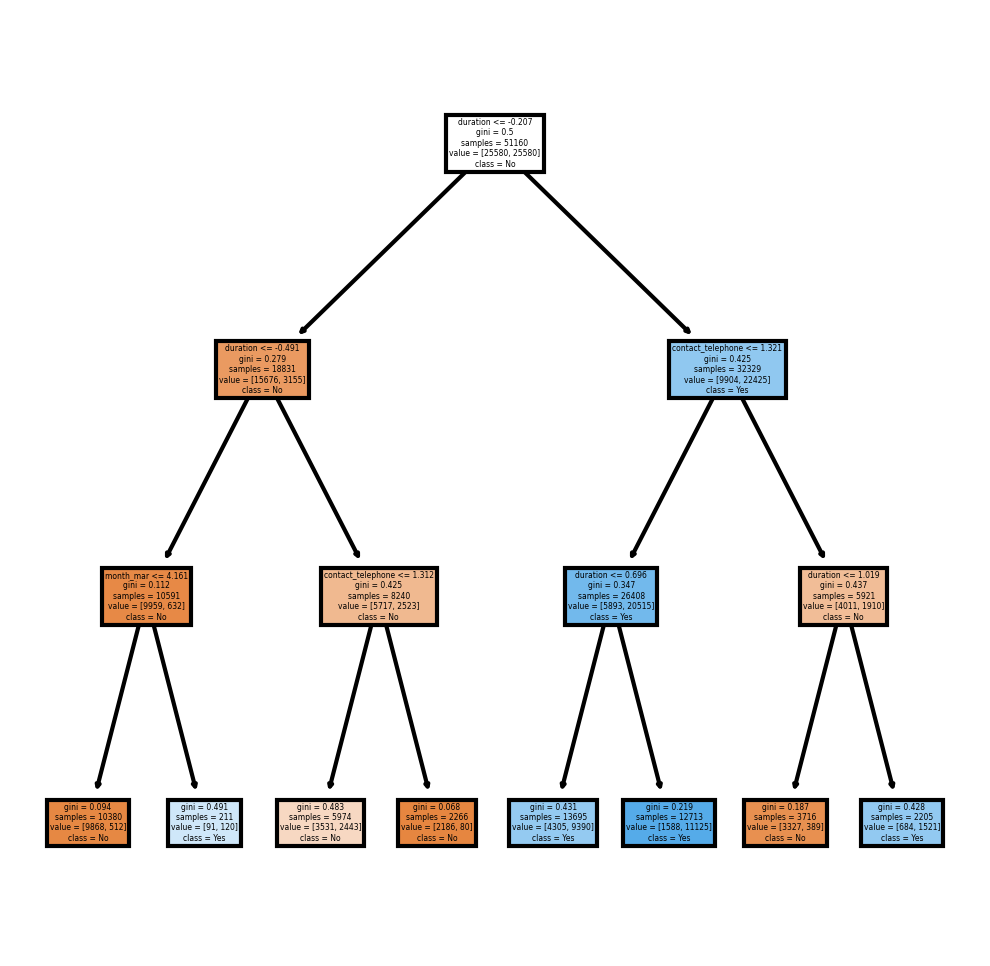

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [ ]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

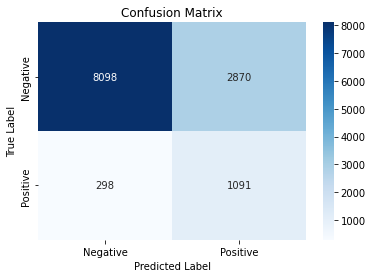

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
sensitivityRaw = cm_raw[1,1]/(cm_raw[1,1] + cm_raw[1,0])
specificityRaw = cm_raw[0,0]/(cm_raw[0,0]+ cm_raw[0,1])

0.7383296863603209

# 3.) Use bagging on your descision tree 

In [ ]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7473496803431253


In [ ]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

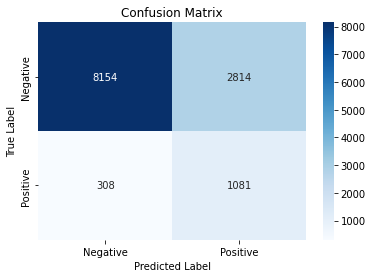

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
sensitivityBag = cm_bag[1,1]/(cm_bag[1,1] + cm_bag[1,0])
specificityBag = cm_bag[0,0]/(cm_bag[0,0]+ cm_bag[0,1])

# 4.) Boost your tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

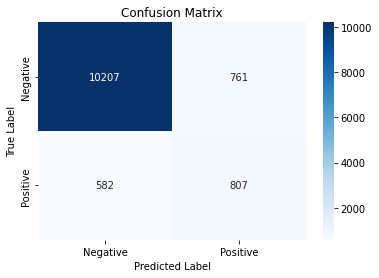

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
sensitivityBoost = cm_boost[1,1]/(cm_boost[1,1] + cm_boost[1,0])
specificityBoost = cm_boost[0,0]/(cm_boost[0,0]+ cm_boost[0,1])

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [ ]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 5.5 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

In [ ]:
### SET YOUR BASE LEARNERS

base_learners = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(),
    AdaBoostClassifier()
]

super_learner = SuperLearner(random_state=42)
super_learner.add(base_learners)

### FIT TO TRAINING DATA

super_learner.fit(X_scaled, y_train)

### GET base_predictions

base_predictions = super_learner.predict(X_scaled)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

In [ ]:
### TRAIN YOUR METALEARNER

In [ ]:
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### INTERPRET COEFFICIENTS

In [ ]:
log_reg.coef_

array([[-3.08729661,  9.84475475, -4.72779182, -4.2361142 ,  9.84475475]])

Random forest and Ada boost are weighted heavily. If either one of them is a 1, the meta learner will take that into account very heavily. If any of the other models are a 1, the meta learner will treat is as a 0 because the other models are very negative. If any of the models are a 0, then it is a 0.

In [ ]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_pred = log_reg.predict(super_learner.predict(X_test))
y_true = y_test
cm_super = confusion_matrix(y_true, y_pred)

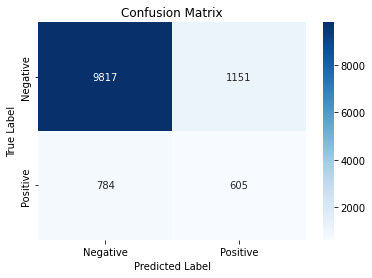

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
sensitivitySuper = cm_super[1,1]/(cm_super[1,1] + cm_super[1,0])
specificitySuper = cm_super[0,0]/(cm_super[0,0]+ cm_super[0,1])

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specifities (Out of Sample)

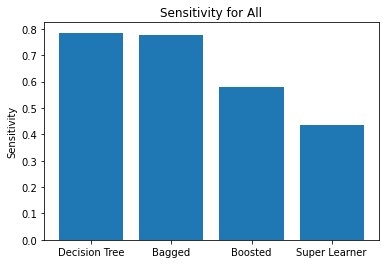

In [ ]:
x = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
y = [sensitivityRaw, sensitivityBag, sensitivityBoost, sensitivitySuper]
plt.bar(x, y)
plt.ylabel('Sensitivity')
plt.title('Sensitivity for All')
plt.show()

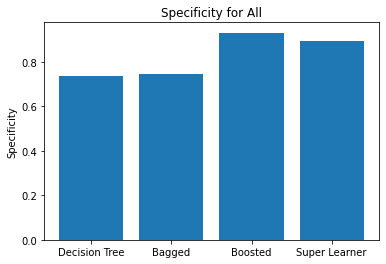

In [ ]:
x = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
y = [specificityRaw, specificityBag, specificityBoost, specificitySuper]
plt.bar(x, y)
plt.ylabel('Specificity')
plt.title('Specificity for All')
plt.show()